In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
births = pd.read_csv('births.csv')

In [2]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


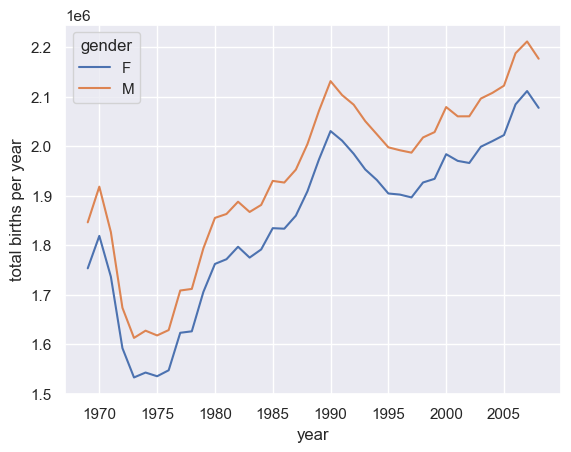

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [5]:
#further data exploration
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [6]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [7]:
births['day'] = births['day'].astype(int)

In [13]:
#create a datetime index form year, month, day
births.index = pd.to_datetime(10000 * births.year +
                            100 * births.month +
                            births.day, format = '%Y%m%d')
births['dayofweek'] = births.index.dayofweek

C:\Users\diego\AppData\Local\Temp\ipykernel_3268\3088115978.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


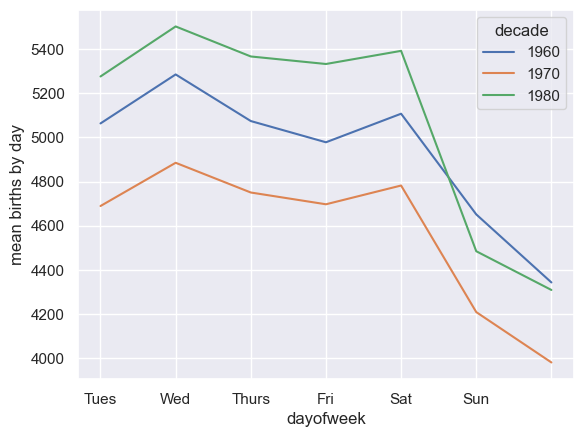

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [18]:
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [22]:
births_by_date.index = [pd.Timestamp(2012, month, day)
                        for (month, day) in births_by_date.index]

births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


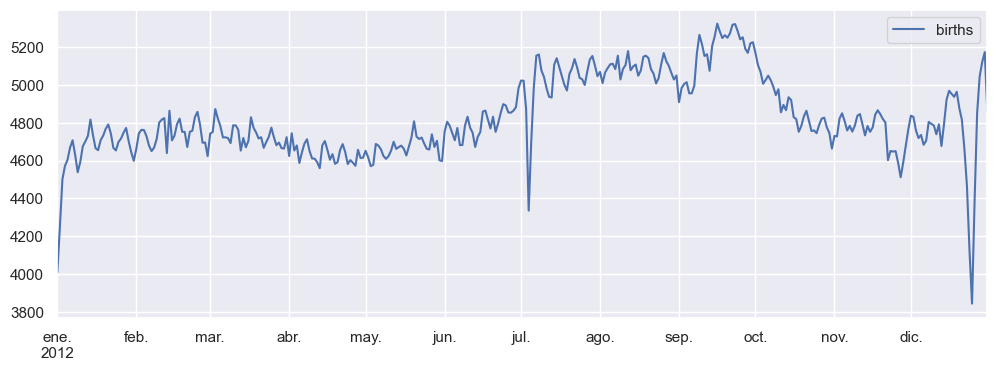

In [23]:
# Plot the results
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);